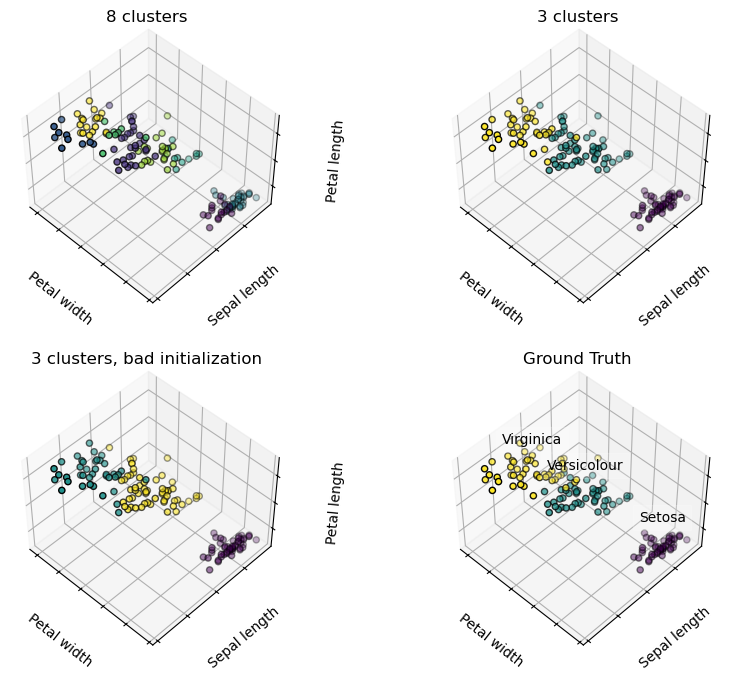

In [1]:
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

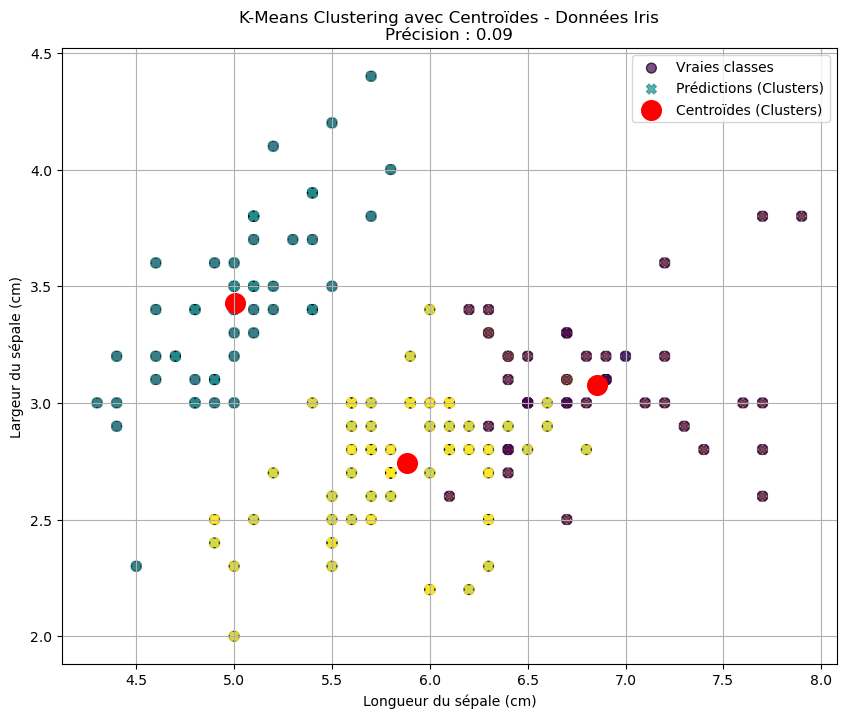


Dans le jeu de données Iris, les classes réelles sont étiquetées comme suit :
0: Setosa (en jaune dans le graphique)
1: Versicolor (en vert dans le graphique)
2: Virginica (en bleu dans le graphique)



In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Chargement des données Iris
iris = load_iris()
X = iris.data
y = iris.target

# Création d'un objet KMeans avec 3 clusters (comme le nombre de classes dans les données Iris)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Récupération des prédictions du modèle
predictions = kmeans.predict(X)

# Récupération des coordonnées des centroïdes
centroids = kmeans.cluster_centers_

# Calcul de la précision en comparant les prédictions aux étiquettes réelles
accuracy = accuracy_score(y, predictions)

# Affichage des données, des prédictions et des centroïdes
plt.figure(figsize=(10, 8))

# Affichage des données avec couleurs réelles
scatter_real = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50, alpha=0.7, label='Vraies classes')

# Affichage des prédictions du modèle avec couleurs de cluster
scatter_pred = plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='viridis', marker='X', s=50, alpha=0.7, label='Prédictions (Clusters)')

# Affichage des centroïdes
scatter_centroids = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=200, label='Centroïdes (Clusters)')

# Paramètres esthétiques
plt.xlabel('Longueur du sépale (cm)')
plt.ylabel('Largeur du sépale (cm)')
plt.title('K-Means Clustering avec Centroïdes - Données Iris\nPrécision : {:.2f}'.format(accuracy))

# Ajout de la légende
plt.legend(handles=[scatter_real, scatter_pred, scatter_centroids],
           labels=['Vraies classes', 'Prédictions (Clusters)', 'Centroïdes (Clusters)'])

plt.grid(True)
plt.show()
annotation_text = """
Dans le jeu de données Iris, les classes réelles sont étiquetées comme suit :
0: Setosa (en jaune dans le graphique)
1: Versicolor (en vert dans le graphique)
2: Virginica (en bleu dans le graphique)
"""
print (annotation_text)

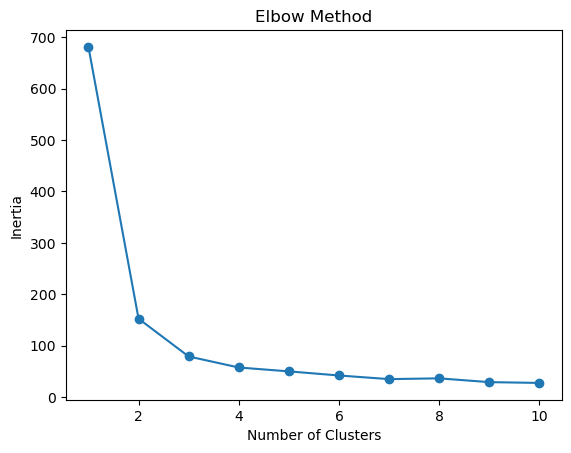

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans

def elbow_method(X, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    return inertias

def plot_elbow_graph(inertias):
    plt.plot(range(1, len(inertias) + 1), inertias, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

if __name__ == "__main__":
    np.random.seed(5)

    iris = datasets.load_iris()
    X = iris.data

    max_clusters = 10  # You can adjust this based on your needs

    inertias = elbow_method(X, max_clusters)
    plot_elbow_graph(inertias)
